In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [459]:
df = pd.read_excel(r"C://Users//ABRAHAM//Desktop//startup_funding.xlsx")

In [460]:
df.head()

,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,Dunzo,Technology,Bangalore,Google,Private Equity,12300000
1,Tata Housing,Real Estate,Mumbai,Hines,Private Equity,23000000
2,HandyTrain,Technology,Delhi NCR,NB Ventures,Private Equity,1000000
3,Mobycy,Technology,Delhi NCR,Undisclosed Investors,Seed Funding,500000
4,Greenlight Planet,Technology,Mumbai,"Apis Partner, Eight Roads Ventures, Bamboo Cap...",Private Equity,60000000


In [461]:
df.head()

,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,Dunzo,Technology,Bangalore,Google,Private Equity,12300000
1,Tata Housing,Real Estate,Mumbai,Hines,Private Equity,23000000
2,HandyTrain,Technology,Delhi NCR,NB Ventures,Private Equity,1000000
3,Mobycy,Technology,Delhi NCR,Undisclosed Investors,Seed Funding,500000
4,Greenlight Planet,Technology,Mumbai,"Apis Partner, Eight Roads Ventures, Bamboo Cap...",Private Equity,60000000


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Startup Name       1495 non-null   object
 1   Industry Vertical  1495 non-null   object
 2   City  Location     1495 non-null   object
 3   Investors Name     1490 non-null   object
 4   InvestmentnType    1495 non-null   object
 5   Amount in USD      1495 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 70.2+ KB


In [463]:
df.apply(lambda x:len(x.unique()))

Startup Name         1281
Industry Vertical     488
City  Location          7
Investors Name       1214
InvestmentnType         3
Amount in USD         334
dtype: int64

In [464]:
df.isnull().sum()

Startup Name         0
Industry Vertical    0
City  Location       0
Investors Name       5
InvestmentnType      0
Amount in USD        0
dtype: int64

In [465]:
df.shape

(1495, 6)

In [466]:
df.shape

(1495, 6)

In [467]:
df.isnull().sum()

Startup Name         0
Industry Vertical    0
City  Location       0
Investors Name       5
InvestmentnType      0
Amount in USD        0
dtype: int64

In [468]:
df.nunique()

Startup Name         1281
Industry Vertical     488
City  Location          7
Investors Name       1213
InvestmentnType         3
Amount in USD         334
dtype: int64

In [469]:
## pandas count distinct values in column
df["City  Location"].value_counts()

Delhi NCR    476
Bangalore    468
Mumbai       336
Chennai       66
Hyderabad     62
Pune          61
Ahmedabad     26
Name: City  Location, dtype: int64

In [470]:
df["Startup Name"].value_counts()

Swiggy               7
Ola Cabs             6
Flipkart             5
Medinfi              5
UrbanClap            5
                    ..
Vegetall             1
Vyome Biosciences    1
Ecolibriumenergy     1
DriversCart          1
SchoolGuru           1
Name: Startup Name, Length: 1281, dtype: int64

In [471]:
df["Industry Vertical"].value_counts()

Consumer Internet                      490
Technology                             251
eCommerce                              123
ECommerce                               36
Logistics                               20
                                      ... 
Online Car Rental Affiliates             1
FinTech Startup Incubation platform      1
Asset Financing platform                 1
Branded Food products online sales       1
Logistics Services Provider              1
Name: Industry Vertical, Length: 488, dtype: int64

In [472]:
df["Investors Name"].value_counts()

Undisclosed Investors                                                            24
Undisclosed investors                                                            23
Kalaari Capital                                                                  12
Sequoia Capital                                                                  11
undisclosed investors                                                            11
                                                                                 ..
Blume Ventures, Indian Angel Network, Kunal Shah, Sandeep Tandon                  1
Hampton Capital                                                                   1
Falcon Edge Capital, Capital Advisers                                             1
Undisclosed private investors                                                     1
Rebright Partners, Sol Primero, Sudhir Anandarao, Ankur Warikoo, Ankur Singla     1
Name: Investors Name, Length: 1213, dtype: int64

In [473]:
df["InvestmentnType"].value_counts()

Private Equity    838
Seed Funding      647
Debt Funding       10
Name: InvestmentnType, dtype: int64

In [474]:
# pandas count unique values ascending:
df["City  Location"].value_counts(ascending=True)

Ahmedabad     26
Pune          61
Hyderabad     62
Chennai       66
Mumbai       336
Bangalore    468
Delhi NCR    476
Name: City  Location, dtype: int64

In [475]:
# pandas count unique values descending:
df["City  Location"].value_counts(ascending=False)

Delhi NCR    476
Bangalore    468
Mumbai       336
Chennai       66
Hyderabad     62
Pune          61
Ahmedabad     26
Name: City  Location, dtype: int64

In [476]:
df.columns

Index(['Startup Name', 'Industry Vertical', 'City  Location', 'Investors Name',
       'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [477]:
#Show "City Location" top names

df["City  Location"].value_counts()


Delhi NCR    476
Bangalore    468
Mumbai       336
Chennai       66
Hyderabad     62
Pune          61
Ahmedabad     26
Name: City  Location, dtype: int64

In [478]:
#Show "City Location" Unique names
df["City  Location"].unique()

array(['Bangalore', 'Mumbai', 'Delhi NCR', 'Chennai', 'Hyderabad', 'Pune',
       'Ahmedabad'], dtype=object)

In [479]:
#Show total "City Location" unique names
df["City  Location"].nunique()

7

In [480]:
#Show total "Industry Vertical" unique names
df["Industry Vertical"].unique()

array(['Technology', 'Real Estate', 'E-Commerce', 'Healthcare',
       'Ecommerce', 'Finance', 'eCommerce', 'ECommerce', 'Inspiration',
       'Lifestyle', 'Consumer Internet', 'Logistics', 'Food & Beverage',
       'eCommece', 'Consumer Portal', 'Education', 'Food & Beverages',
       'ecommerce', 'Others', 'healthcare', 'FMCG', 'Reality',
       'Transportation & Logistics Platform',
       'Enterprise Marketing Automation platform', 'Digital Healthcare',
       'Last Minute Hotel Booking App',
       'Online Food ordering & Delivery platform',
       'App based Bus Pooling Services',
       'Car Maintenance & Management mobile app',
       'Online Wedding Marketplace', 'Custom Made furniture e-tailer',
       'QSR Chain', 'Smart Safety Wearable Devices',
       'Cab Sharing service Mobile app',
       'Home Cooked Food Order & Delivery platform',
       'Online School for Analytics learning',
       'Picture creation & Social mobile app',
       'Nonbanking finance company', 'Online

In [481]:
df["Industry Vertical"].nunique()

488

# Create duummies for "InvestmentnType" and save it as 'investment'

In [482]:
investment = pd.get_dummies(df["InvestmentnType"])

In [483]:
investment

,Debt Funding,Private Equity,Seed Funding
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1490,0,0,1
1491,0,1,0
1492,0,0,1
1493,0,0,1


# Create duummies for "City Location" and save it as 'city'

In [484]:
city = pd.get_dummies(df["City  Location"])

In [485]:
city

,Ahmedabad,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1490,0,0,0,1,0,0,0
1491,0,1,0,0,0,0,0
1492,0,1,0,0,0,0,0
1493,0,0,1,0,0,0,0


# Drop columns ["Startup Name", "Industry Vertical","Investors Name", "InvestmentnType", "City Location"] from "df"

In [486]:
df = df.drop(columns=["Startup Name", "Industry Vertical","Investors Name", "InvestmentnType","City  Location"],axis=1)

In [487]:
df

,Amount in USD
0,12300000
1,23000000
2,1000000
3,500000
4,60000000
...,...
1490,1000000
1491,3500000
1492,400000
1493,500000


# Concatenate "df" to 'investment' and 'city'

In [488]:
frame = [investment,city]

In [489]:
new_df = df.join(frame)

In [490]:
new_df

,Amount in USD,Debt Funding,Private Equity,Seed Funding,Ahmedabad,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
0,12300000,0,1,0,0,1,0,0,0,0,0
1,23000000,0,1,0,0,0,0,0,0,1,0
2,1000000,0,1,0,0,0,0,1,0,0,0
3,500000,0,0,1,0,0,0,1,0,0,0
4,60000000,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1490,1000000,0,0,1,0,0,0,1,0,0,0
1491,3500000,0,1,0,0,1,0,0,0,0,0
1492,400000,0,0,1,0,1,0,0,0,0,0
1493,500000,0,0,1,0,0,1,0,0,0,0


In [491]:
new_df.isnull().sum()

Amount in USD     0
Debt Funding      0
Private Equity    0
Seed Funding      0
Ahmedabad         0
Bangalore         0
Chennai           0
Delhi NCR         0
Hyderabad         0
Mumbai            0
Pune              0
dtype: int64

In [492]:
new_df.describe()

,Amount in USD,Debt Funding,Private Equity,Seed Funding,Ahmedabad,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
count,1.495000e+03,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,1.426279e+07,0.006689,0.560535,0.432776,0.017391,0.313043,0.044147,0.318395,0.041472,0.224749,0.040803
std,9.173061e+07,0.081539,0.496488,0.495626,0.130768,0.463887,0.205491,0.466009,0.199445,0.417557,0.197899
min,1.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.325000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.200000e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000e+06,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.500000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [493]:
x = new_df.drop(columns=['Amount in USD'],axis=1)
y = new_df["Amount in USD"]

In [494]:
train_x,train_y,test_x,test_y =train_test_split(x,y,test_size=0.23,random_state=40)

In [495]:
x

,Debt Funding,Private Equity,Seed Funding,Ahmedabad,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1490,0,0,1,0,0,0,1,0,0,0
1491,0,1,0,0,1,0,0,0,0,0
1492,0,0,1,0,1,0,0,0,0,0
1493,0,0,1,0,0,1,0,0,0,0


In [496]:
y

0       12300000
1       23000000
2        1000000
3         500000
4       60000000
          ...   
1490     1000000
1491     3500000
1492      400000
1493      500000
1494     8000000
Name: Amount in USD, Length: 1495, dtype: int64

In [497]:
x.shape,y.shape

((1495, 10), (1495,))

In [498]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
#Creating model and fitting data
model = LinearRegression()

In [499]:
model.fit(x_train,y_train)

LinearRegression()

In [500]:
predict_test = model.predict(x_test)

print("accuracy score", r2_score(y_test,predict_test))

print("intercept",model.intercept_)

print("coeeficient",model.coef_)

accuracy score 0.03091462418796187
intercept 7798760.3016582765
coeeficient [ -1810869.55256378  12288037.15512924 -10477167.60256545
  -2624799.99652974  12357275.89073782  -3966220.46613973
   2044862.65840533  -1435280.56566899  -2884925.51369102
  -3490912.00711366]


In [501]:
predict_train =model.predict(x_train)

print("accuracy score",r2_score(y_train,predict_train))

accuracy score 0.01971980911066662


# Draw scatter plot between ytest and predict_test

Text(0, 0.5, 'predicted y')

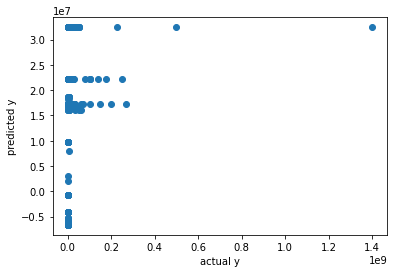

In [502]:
plt.scatter(y_test,predict_test)
plt.xlabel("actual y")
plt.ylabel("predicted y")

In [503]:
from sklearn.metrics import mean_squared_error

In [504]:
print("m s e",mean_squared_error(y_test,predict_test))

m s e 6525473839762941.0


# KNN regressor model

In [509]:
from sklearn.neighbors import KNeighborsRegressor

In [510]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

In [513]:
model = KNeighborsRegressor(n_neighbors=1)

In [514]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [515]:
predict_test = model.predict(x_test)

In [518]:
print("accuracy score",r2_score(y_test,predict_test))

accuracy score -0.07297178058000697


In [519]:
predict_train = model.predict(x_train)

print("accuracy score",r2_score(y_train,predict_train))

accuracy score -0.07100749388636274


In [524]:
#finding k vale

k_list = list(range(1,21))

score_test = []
score_train=[]

for i in k_list:
    model =KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    
    predict_test = model.predict(x_test)
    
    predict_train = model.predict(x_train)
    
    acc_score_train =r2_score(y_train,predict_train)
    
    acc_score_test = r2_score(y_test,predict_test)
    
    score_test.append(acc_score_test)
    
    score_train.append(acc_score_train)

In [525]:
score_test,score_train

([-0.07297178058000697,
  -0.016045805015892478,
  -0.0010929437677267284,
  -0.0015786185473194436,
  -0.0008888281998913339,
  -0.003190381605840953,
  -0.005119471287579946,
  -0.0014210863059429535,
  -0.003496010390740434,
  0.012082625464993613,
  0.010343399735675995,
  0.013228342166560991,
  0.012886834888346965,
  0.012186817509341363,
  0.010136914642916883,
  0.00963649937817912,
  0.008621806376184926,
  0.00702211661139196,
  0.005774764864847737,
  0.005102270527609809],
 [-0.07100749388636274,
  -0.02301828226525604,
  -0.007592252843998448,
  -0.007916502875649822,
  -0.005706395599774705,
  -0.005902114692100557,
  -0.006266438594470403,
  -0.0024862734585637813,
  -0.0037399196118863554,
  0.008161938425948811,
  0.007293992098233892,
  0.009929601393428578,
  0.009006389726559316,
  0.00871521746091275,
  0.007525458828127496,
  0.006512665488329739,
  0.006251100343072191,
  0.005322719706176371,
  0.004582975182060189,
  0.003754214007099854])

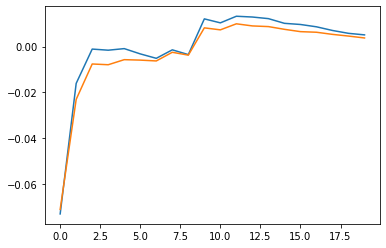

In [529]:
plt.plot(score_test)
plt.plot(score_train)
plt.show()

In [534]:
#k=18
model = KNeighborsRegressor(n_neighbors=18)
model.fit(x_train,y_train)
predict_test = model.predict(x_test)

print("r2_score",r2_score(y_test,predict_test))

r2_score 0.00702211661139196
